In [1]:
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from glob import glob

In [2]:
Set1 = mpl.colormaps['Set1']
Pastel1 = mpl.colormaps['Pastel1']
mcolor = Set1(0.0)
hcolor = Set1(1.0 / 9)
mcolor_light = Pastel1(0.0)
hcolor_light = Pastel1(1.0 / 9)
output = './output/'

In [3]:
ivdata = {}
iddata = {}
for cell in glob('./valdata/*D1*spec.json'):
    spec = json.load(open(cell))
    ephy = spec['cell_id']
    stim = [s[0]['stimulus_total_amp'] for s in spec['cell_features']['IV']]
    volt = [s[1]['steady_state_voltage_stimend'][0] for s in spec['cell_features']['IV']]
    ivdata[ephy] = {'stimulus': stim, 'voltage': volt}
    
    stim = [s[0]['stimulus_total_amp'] for s in spec['cell_features']['IDthresh']]
    #rate = [s[1]['mean_frequency'][0] for s in spec['cell_features']['IDthresh']]
    rate = [s[1]['inv_first_ISI'][0] for s in spec['cell_features']['IDthresh']]
    iddata[ephy] = {'stimulus': stim, 'frequency': rate}

In [4]:
models = []
for optdata in glob('./optdata/[hm]*'):
    model = json.load(open(optdata + '/val_models.json'))
    models.append(model)

In [5]:
sel_models = []
for optdata in ['./optdata/mCP-dspn-e150917_c6_D1-manimal_1_n24_04102017_cel1',
                './optdata/hPu-dspn-e150917_c6_D1-mAB5_porta76_cel5',
                './optdata/mCP-dspn-e160118_c7_D1-manimal_1_n30_04102017_cel1',
                './optdata/hPu-dspn-e160118_c7_D1-mAB5_porta80A_cel15',
                './optdata/mCP-dspn-e160118_c8_D1-manimal_5_n27_04102017_cel2',
                './optdata/hPu-dspn-e160118_c8_D1-mAB5_porta76_cel2',
               ]:
    model = json.load(open(optdata + '/val_models.json'))
    sel_models.append(model)
sel_cells = ['150917_c6_D1', 
             '160118_c7_D1', 
             '160118_c8_D1',
            ]

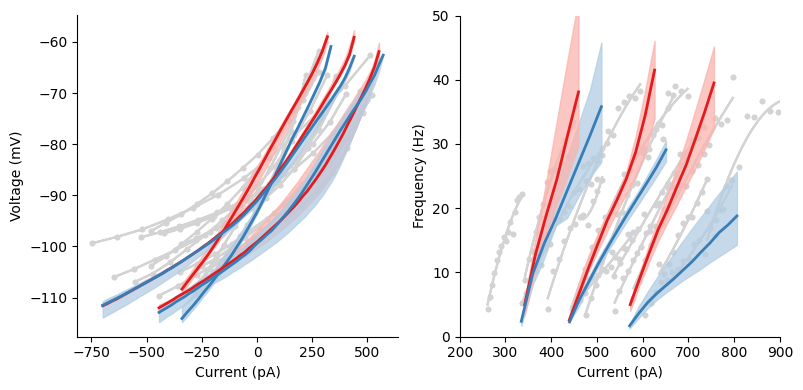

In [6]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Voltage (mV)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for cell_id in sel_cells:
    for cell in ivdata:
        if cell == cell_id:
            color = 'lightgrey'  # 'black'
            zorder = 1  # 100
        else:
            color = 'lightgrey'
            zorder = 1
        x = ivdata[cell]['stimulus']
        y = ivdata[cell]['voltage']
        #ax.plot(x, y, '.-', color=color, zorder=zorder)
        ax.plot(x, y, '.-', color=color, zorder=zorder)
    
for model in sel_models:
        iv = []
        for param in model:
            for x, y in zip(param['iv_curve']['stim'], param['iv_curve']['volt']):
                iv.append([x, y])
        iv = np.array(sorted(np.round(iv, 1), key=lambda k: k[0]))
        xs = sorted(set(iv[:, 0]))
        ymin = [min(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in iv if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.75)
        ax.plot(xs, ymed, color=color, lw=2)
        
ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(200, 900)
ax.set_ylim(0, 50)

for cell_id in sel_cells:
    for cell in iddata:
        if cell == cell_id:
            color = 'lightgrey'  # 'black'
            zorder = 1  # 100
        else:
            color = 'lightgrey'
            zorder = 1
        x = iddata[cell]['stimulus']
        y = iddata[cell]['frequency']
        coef = np.polyfit(x, y, 2)
        poly = np.poly1d(coef)
        xx = np.linspace(x[0], x[-1])
        yy = poly(xx)
        ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
        
for model in sel_models:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        zorder = 2 if 'animal' in param['morph'] else 1
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.75, zorder=zorder)
        ax.plot(xs, ymed, color=color, lw=2)

fig.tight_layout()

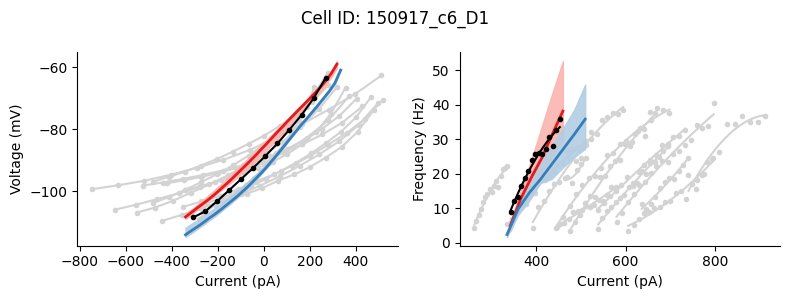

In [7]:
cell_id = '150917_c6_D1'

fig = plt.figure(figsize=(8,3))
fig.suptitle('Cell ID: ' + cell_id)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Voltage (mV)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in ivdata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = ivdata[cell]['stimulus']
    y = ivdata[cell]['voltage']
    ax.plot(x, y, '.-', color=color, zorder=zorder)
for model in models:
    if model[0]['ephys'] == cell_id:
        iv = []
        for param in model:
            for x, y in zip(param['iv_curve']['stim'], param['iv_curve']['volt']):
                iv.append([x, y])
        iv = np.array(sorted(np.round(iv, 1), key=lambda k: k[0]))
        xs = sorted(set(iv[:, 0]))
        ymin = [min(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in iv if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in iddata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = iddata[cell]['stimulus']
    y = iddata[cell]['frequency']
    coef = np.polyfit(x, y, 2)
    poly = np.poly1d(coef)
    xx = np.linspace(x[0], x[-1])
    yy = poly(xx)
    ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
for model in models:
    if model[0]['ephys'] == cell_id:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

fig.tight_layout()
fig.savefig(output + cell_id + '.pdf')

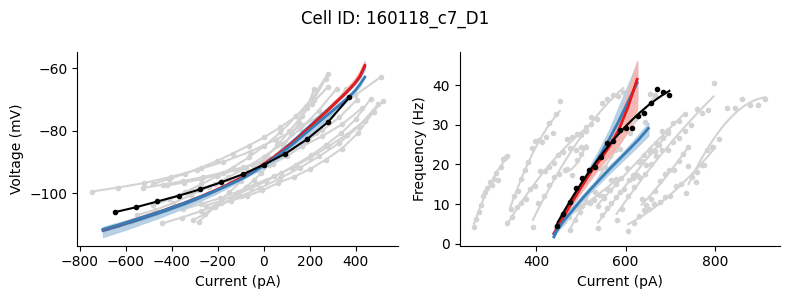

In [8]:
cell_id = '160118_c7_D1'

fig = plt.figure(figsize=(8,3))
fig.suptitle('Cell ID: ' + cell_id)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Voltage (mV)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in ivdata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = ivdata[cell]['stimulus']
    y = ivdata[cell]['voltage']
    ax.plot(x, y, '.-', color=color, zorder=zorder)
for model in models:
    if model[0]['ephys'] == cell_id:
        iv = []
        for param in model:
            for x, y in zip(param['iv_curve']['stim'], param['iv_curve']['volt']):
                iv.append([x, y])
        iv = np.array(sorted(np.round(iv, 1), key=lambda k: k[0]))
        xs = sorted(set(iv[:, 0]))
        ymin = [min(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in iv if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in iddata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = iddata[cell]['stimulus']
    y = iddata[cell]['frequency']
    coef = np.polyfit(x, y, 2)
    poly = np.poly1d(coef)
    xx = np.linspace(x[0], x[-1])
    yy = poly(xx)
    ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
for model in models:
    if model[0]['ephys'] == cell_id:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

fig.tight_layout()
fig.savefig(output + cell_id + '.pdf')

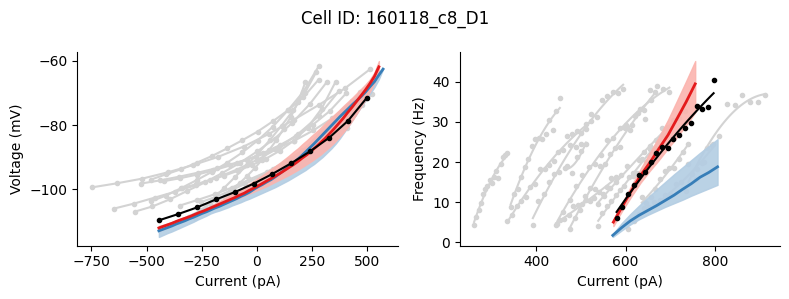

In [9]:
cell_id = '160118_c8_D1'

fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cell ID: ' + cell_id)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Voltage (mV)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in ivdata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = ivdata[cell]['stimulus']
    y = ivdata[cell]['voltage']
    ax.plot(x, y, '.-', color=color, zorder=zorder)
for model in models:
    if model[0]['ephys'] == cell_id:
        iv = []
        for param in model:
            for x, y in zip(param['iv_curve']['stim'], param['iv_curve']['volt']):
                iv.append([x, y])
        iv = np.array(sorted(np.round(iv, 1), key=lambda k: k[0]))
        xs = sorted(set(iv[:, 0]))
        ymin = [min(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in iv if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in iddata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = iddata[cell]['stimulus']
    y = iddata[cell]['frequency']
    coef = np.polyfit(x, y, 2)
    poly = np.poly1d(coef)
    xx = np.linspace(x[0], x[-1])
    yy = poly(xx)
    ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
for model in models:
    if model[0]['ephys'] == cell_id:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

fig.tight_layout()
fig.savefig(output + cell_id + '.pdf')

In [10]:
scaled_models = []
for optdata in glob('./optdata/scaled_*'):
    model = json.load(open(optdata + '/val_models.json'))
    scaled_models.append(model)

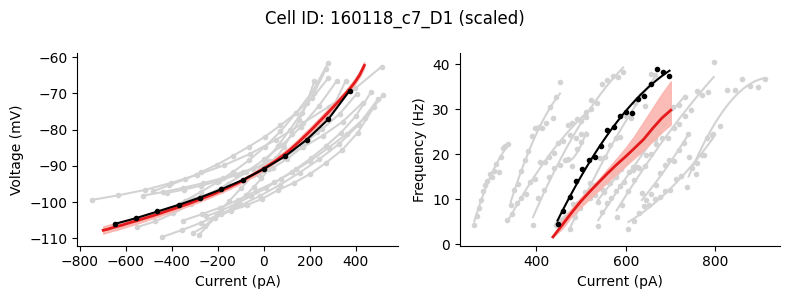

In [11]:
cell_id = '160118_c7_D1'

fig = plt.figure(figsize=(8,3))
fig.suptitle('Cell ID: ' + cell_id + ' (scaled)')

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Voltage (mV)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in ivdata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = ivdata[cell]['stimulus']
    y = ivdata[cell]['voltage']
    ax.plot(x, y, '.-', color=color, zorder=zorder)
for model in scaled_models:
    if model[0]['ephys'] == cell_id:
        iv = []
        for param in model:
            for x, y in zip(param['iv_curve']['stim'], param['iv_curve']['volt']):
                iv.append([x, y])
        iv = np.array(sorted(np.round(iv, 1), key=lambda k: k[0]))
        xs = sorted(set(iv[:, 0]))
        ymin = [min(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in iv if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in iv if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for cell in iddata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
    else:
        color = 'lightgrey'
        zorder = 1
    x = iddata[cell]['stimulus']
    y = iddata[cell]['frequency']
    coef = np.polyfit(x, y, 2)
    poly = np.poly1d(coef)
    xx = np.linspace(x[0], x[-1])
    yy = poly(xx)
    ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
for model in scaled_models:
    if model[0]['ephys'] == cell_id:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)

fig.tight_layout()
fig.savefig(output + cell_id + '-scaled' + '.pdf')

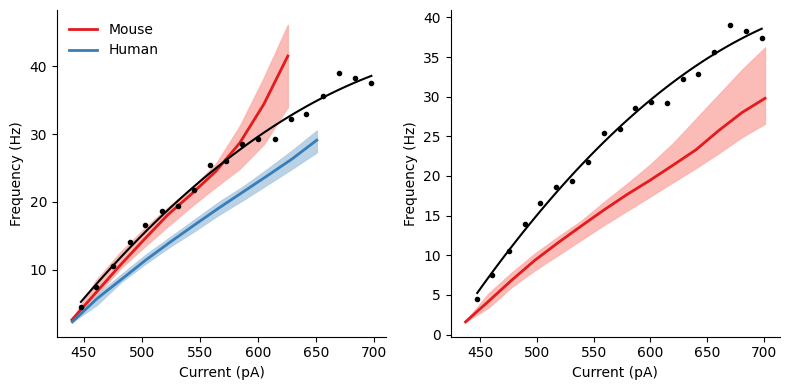

In [12]:
fig = plt.figure(figsize=(8, 4))

#cell_id = '160118_c7_D1'

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xlim(300, 700)

for cell_id in sel_cells[1:2]:
    for cell in iddata:
        if cell == cell_id:
            color = 'black'
            zorder = 100
            x = iddata[cell]['stimulus']
            y = iddata[cell]['frequency']
            coef = np.polyfit(x, y, 2)
            poly = np.poly1d(coef)
            xx = np.linspace(x[0], x[-1])
            yy = poly(xx)
            ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
        
for model in sel_models[2:4]:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        label = 'Mouse' if 'animal' in param['morph'] else 'Human'
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2, label=label)
        ax.legend(frameon=False, loc='upper left')

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Current (pA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for cell in iddata:
    if cell == cell_id:
        color = 'black'
        zorder = 100
        x = iddata[cell]['stimulus']
        y = iddata[cell]['frequency']
        coef = np.polyfit(x, y, 2)
        poly = np.poly1d(coef)
        xx = np.linspace(x[0], x[-1])
        yy = poly(xx)
        ax.plot(x, y, '.', xx, yy, color=color, zorder=zorder)
        
for model in scaled_models:
    if model[0]['ephys'] == cell_id:
        id_curve = []
        for param in model:
            for x, y in zip(param['id_curve']['stim'], param['id_curve']['freq']):
                id_curve.append([x, y])
        id_curve = np.array(sorted(np.round(id_curve, 1), key=lambda k: k[0]))
        xs = sorted(set(id_curve[:, 0]))
        ymin = [min(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymax = [max(ycur for xcur, ycur in id_curve if xcur==xc ) for xc in xs]
        ymed = [np.median([ycur for xcur, ycur in id_curve if xcur==xc]) for xc in xs]
        color = mcolor if 'animal' in param['morph'] else hcolor
        color_light = mcolor_light if 'animal' in param['morph'] else hcolor_light
        ax.fill_between(xs, ymin, ymax, color=color_light, ec=color_light, alpha=0.9)
        ax.plot(xs, ymed, color=color, lw=2)
        
fig.tight_layout()